# User Engagement Analysis

Explore user session counts, repeat sessions, and engagement metrics.


In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

candidates = [
    r"DRIVER={ODBC Driver 17 for SQL Server};SERVER=np:\\localhost\pipe\MSSQL$SQLEXPRESS\sql\query;DATABASE=Funnel_Purchases;Trusted_Connection=yes;",
    r"DRIVER={ODBC Driver 17 for SQL Server};SERVER=(localdb)\\MSSQLLocalDB;DATABASE=Funnel_Purchases;Trusted_Connection=yes;",
    r"DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost\\SQLEXPRESS;DATABASE=Funnel_Purchases;UID=sa;PWD=YourPassword;",
]

def get_conn(timeout=30):
    for conn_str in candidates:
        try:
            conn = pyodbc.connect(conn_str, timeout=timeout)
            return conn
        except Exception:
            continue
    raise RuntimeError('All connection attempts failed')

C:\Users\asus\AppData\Local\Temp\ipykernel_12952\4104055968.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  users_multi = pd.read_sql_query(sql_multi_sess, conn)


Users with >1 distinct sessions (top 20):
      user_id  session_count
0   512475445           7393
1   526731152           2773
2   514649263           2334
3   563459593           1618
4   561163588           1182
5   554631275            860
6   512500203            785
7   513847031            730
8   548931675            681
9   537873067            670
10  556593461            669
11  553292256            587
12  512365995            405
13  515794073            347
14  512386032            327
15  529839452            327
16  538019949            314
17  512443087            313
18  512661902            299
19  538593075            286


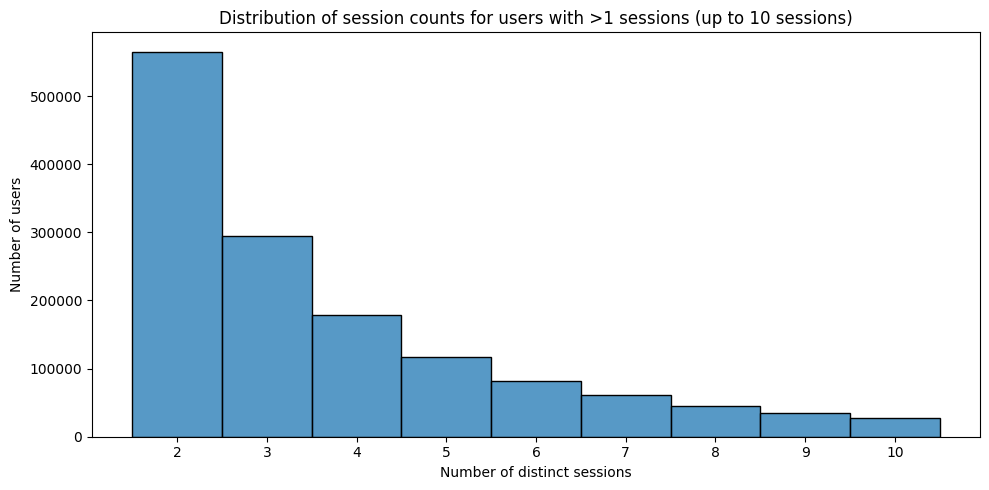

In [2]:
# --- Users with more than 1 distinct sessions ---
sql_multi_sess = "SELECT user_id, COUNT(DISTINCT user_session) AS session_count FROM dbo.[2019-Oct] GROUP BY user_id HAVING COUNT(DISTINCT user_session) > 1 ORDER BY session_count DESC"
conn = get_conn()
users_multi = pd.read_sql_query(sql_multi_sess, conn)
conn.close()
print('Users with >1 distinct sessions (top 20):')
print(users_multi.head(20))
# Quick visualization: distribution of session_count for these users
if not users_multi.empty:
    plt.figure(figsize=(10, 5))
    max_sessions = min(10, users_multi['session_count'].max())
    sns.histplot(users_multi[users_multi['session_count'] <= max_sessions]['session_count'], bins=range(2, max_sessions+2), discrete=True)
    plt.title('Distribution of session counts for users with >1 sessions (up to 10 sessions)')
    plt.xlabel('Number of distinct sessions')
    plt.ylabel('Number of users')
    plt.xticks(range(2, max_sessions+1))
    plt.tight_layout()
    plt.show()

## Optimization Note

- User engagement queries select only user/session columns.
- Use chunked loading for large user tables.
- Example: `SELECT user_id, user_session FROM dbo.[2019-Oct]`
